# Linear Regression Model

## Creating the dataset

Dataset will be generated using following code

### Generating Data

In [1]:
import torch

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
intercept = 1.5
slope = 3.2

y = intercept + slope * X

#### Visualization of data

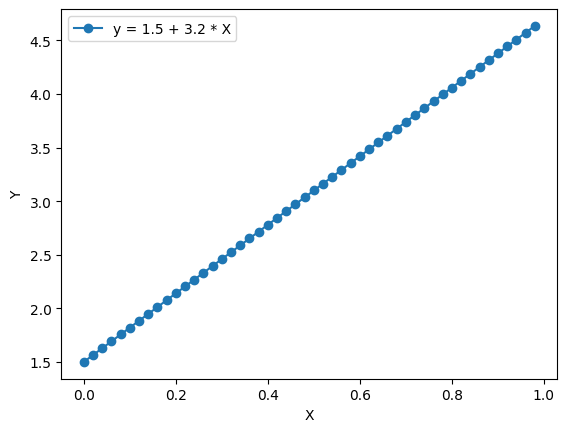

In [40]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=f'y = {intercept} + {slope} * X', marker='o')
plt.legend()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

### Data train and test data split

In [15]:
from sklearn.model_selection import train_test_split

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=False)

In [44]:
print(f'Lengthof train_X::{len(train_X)}, test_X::{len(test_X)}, train_y::{len(train_y)}, test_y::{len(test_y)}')

Lengthof train_X::40, test_X::10, train_y::40, test_y::10


#### Train and test data visualization

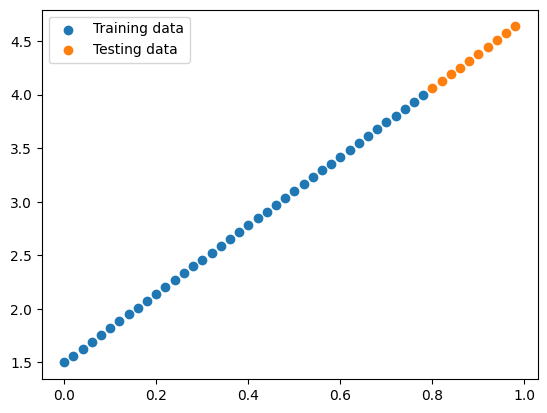

In [45]:
plt.scatter(train_X, train_y, label="Training data")
plt.scatter(test_X, test_y, label="Testing data")
plt.legend()

## Building the model

In [60]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        param_rand = torch.randn(1, requires_grad=True, dtype=torch.float)
        bias_rand = torch.randn(1, requires_grad=True, dtype=torch.float)

        self.weights = nn.Parameter(param_rand)
        self.bias = nn.Parameter(bias_rand)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # b0 + b1 * X
        return self.bias + self.weights * x

## Predicting data without training

In [73]:
torch.manual_seed(42)
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [85]:
# manual seed will make sure the random number generated in the module is reproducible
torch.manual_seed(42)

model = LinearRegressionModel()

with torch.inference_mode():
    pred_y = model(test_X)

### Visualization of the predictions

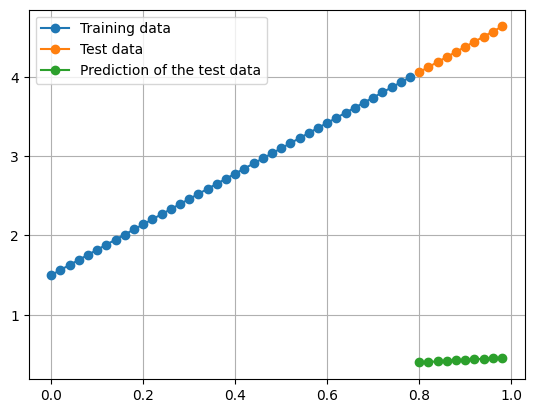

In [97]:
plt.plot(train_X, train_y, label='Training data', marker='o')
plt.plot(test_X, test_y, label='Test data', marker='o')
plt.plot(test_X, pred_y, label='Prediction of the test data', marker='o')
plt.grid()
plt.legend()